# Housing Values in Suburbs of Boston


<p align="center"><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5315/logos/front_page.png" width=250px></p><br>

## Overview

This project is being made as a study on the known Boston Houses data set [1]. This dataset is made from a study from a US census regarding various house prices in different areas in the city of Boston, MA. Besides the price, the dataset also contains other 13 attributes, such as:

- CRIM - per capita crime rate by town
- N - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- Along others..

This data was first published in 1978 by Harrison, D. and Rubinfeld, D.L. and it contains around 506 samples, which makes it fairly small given the size of Boston.

This notebook will be divided into 3 sections as follows:

- Descriptive: The first section will be focused on conducting a statistical study on the dataset, where I will use descriptive statistics and plots to describe the Boston housing prices.

- Inferential: This section will be used to analyse the dataset using inferential statistics in order to determine differences in house prices betwen their location.
- Predict: The last section will be left for the prediction, Where I will be utilizing the Python library, keras, to conduct a neural network to be able to predict the median house price


## Descriptive

Descriptive statistics is used to describe and summarize a data set, and it can be used the entire representation or a sample of the data. descriptive statistics also masures the mean, median, mode an other measures such as standard deviation, variance and the kurtosis and skewness.

Frst I will use descriptive statistics and plots in order to better understand the dataset to be studied, and also to understand the correlation between all the variables.



Before we start, we will need to import all the necessary Python libraries for this analysis:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

Next we could load the dataset from a CSV, but we can also use sklearn library to load the dataset.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

It's also good to understand all the values of the dataset, so we run the following code:

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


This translates to the following:

- data: contains the raw dataset
- target: prices of the houses
- feature_names: names of all the attributes
- DESCR: describes the attributes from the dataset

We can have a further look into the description:

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

With the basics of the dataset explained, we can now move on to start loading the data into a dataframe using pandas:

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


As stated below in the Overview, the target here is the median price of the houses, and this attribute is not shown in the above dataframe, so it's necessary to add it as well:

In [6]:
df['MEDV'] = boston.target

In [7]:
#Showing the updated dataframe
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In order to analyze this data in a more quantitative description, I will make use of the pandas describe function which gives us a very well summary of descriptive statistics:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


From the above, if we observe the mean (22.53) and the median (21.2) we can notice that the distribution is slightly right skewed. This is more obvious looking at distribution plots below.

In order to better understand the relationship of the target with the other features we can plot the distribution of the target using the distplot function from seaborn, which is able to combine a histogram with a kernel density estimation plot:

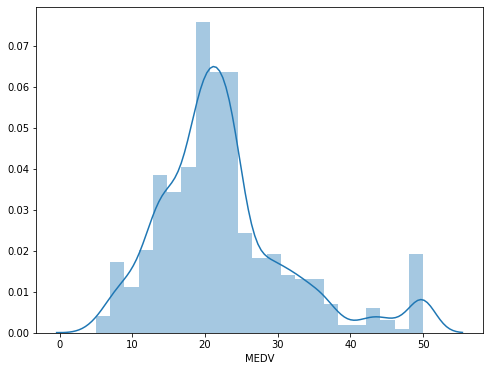

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(df['MEDV'])
plt.show()

From the above we can notice that the values from the target MEDV are distributed normally and with just a few outliers.

It's also important to have a look into the correlation between the attributes, for this we can use the pandas function .corr(), which will provide us with all attributes and values in a range between -1 and 1, where 1 means a total correlation, 0 no correlation and -1 negative correlation.

In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


For better visualization purposes we can utilize seaborn to plot a heattmap of these correlations:

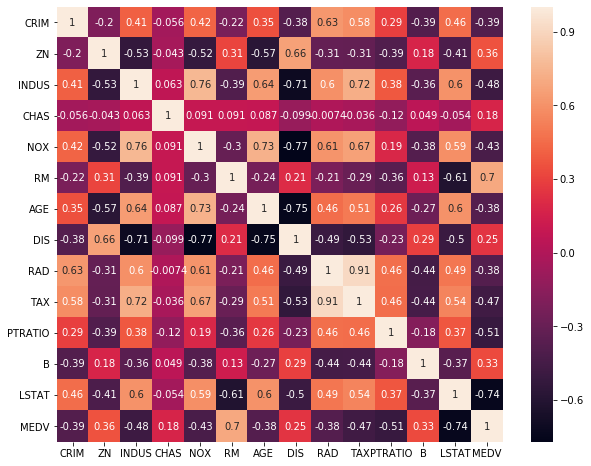

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True)

By looking at the above correlation heatmap we can determine that RM has a strong positive correlation with MEDV (0.7) and that LSTAT has a high negative correlation with MEDV (-0.74).

We were able to describe in more details the relation between the attributes and their values using the help of Python and its libraries.

Next we will start covering the inferential statistics section.

## Inferential

Inferential statistics uses a sample of data set in order to describe and also make inferences about the data. The use of inferential statistics helps to make generalizations about the data.


## Predict

The main objective of this section is to build a working model that is able to predict the value of the Boston houses, in order to do so, I will first separate the dataset into features and the target variable. The features, will provide quantitative information, as the target, 'MEDV', will be the variable to predict.

Before we begin, the first step necessary is to create a model and train it, and given that this is a regression problem, it makes sense to create a Linear Regression model.

Also, from our previous analysis, we identified that  RM and LSTAT are highly correlated, therefore we will use it as features to compare with our target MEDV.

## References

[1] https://www.kaggle.com/c/boston-housing/overview